# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Dataset

In [4]:
df=pd.read_csv(r'patient_data.csv')
df

,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
0,1,Male,37,193.4,129.4,East,High
1,2,Female,45,210.7,107.1,West,Low
2,3,Male,63,244.3,103.9,West,Low
3,4,Male,53,184.5,127.2,West,High
4,5,Male,29,175.7,116.6,South,High
...,...,...,...,...,...,...,...
95,96,Female,58,224.8,126.9,East,High
96,97,Female,68,200.4,123.0,North,Medium
97,98,Female,71,243.6,111.0,West,Low
98,99,Female,51,192.1,121.0,West,High


# Q1: Outlier Detection and Feature Reduction (2 Marks)
- Use VarianceThreshold to remove constant features (if any).
- Detect and remove outliers from CholesterolLevel using any method of choice.
- Replace any missing values.

In [5]:
# Selecting numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
x = df[numerical_columns]

In [6]:
#Apply Variance Threshold
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(x)

VarianceThreshold(threshold=0)

In [7]:
#Detecting Non constant column
var_thres.get_support()

array([ True,  True,  True,  True])

In [8]:
#It gives all true values means there is no constant column

In [10]:
# Drop missing values temporarily for outlier detection
chol = df['CholesterolLevel'].dropna()

# Calculate IQR
Q1 = chol.quantile(0.25)
Q3 = chol.quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['CholesterolLevel'] >= lower_bound) & (df['CholesterolLevel'] <= upper_bound)]


df

,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
0,1,Male,37,193.4,129.4,East,High
1,2,Female,45,210.7,107.1,West,Low
2,3,Male,63,244.3,103.9,West,Low
3,4,Male,53,184.5,127.2,West,High
4,5,Male,29,175.7,116.6,South,High
...,...,...,...,...,...,...,...
94,95,Female,51,208.3,105.3,East,Low
95,96,Female,58,224.8,126.9,East,High
96,97,Female,68,200.4,123.0,North,Medium
97,98,Female,71,243.6,111.0,West,Low


# Q2: Data Visualization (2 Marks)
- Generate a box plot comparing BloodPressure between different RiskCategory levels.
- Create a count plot showing the number of patients in each RiskCategory per Region.

<AxesSubplot:xlabel='RiskCategory', ylabel='BloodPressure'>

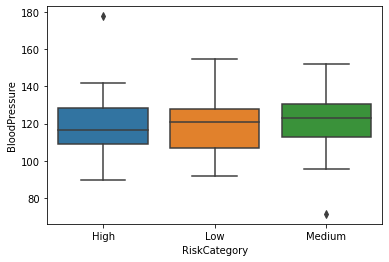

In [11]:
#Box Plot
sns.boxplot(data=df, x='RiskCategory', y='BloodPressure')

<AxesSubplot:xlabel='Region', ylabel='count'>

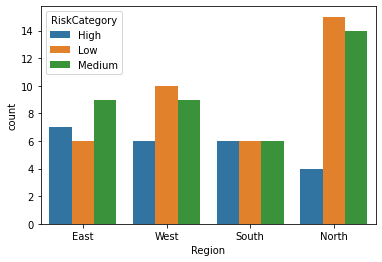

In [12]:
#Count Plot
sns.countplot(data=df, x='Region', hue='RiskCategory')

# Q3: Statistical Hypothesis Testing (3 Marks)
Perform the following:
- Is the average CholesterolLevel significantly different from 200 mg/dL having a sample 
size of 20?
- Is there a significant relationship between Region and RiskCategory?

Include:
- Null and alternative hypotheses
- Test statistic, p-value
- Your interpretation (reject/fail to reject H₀)


In [13]:
from scipy import stats
y= df['CholesterolLevel']
pop_mean=200
sample_size=20
random_sample=np.random.choice(df['CholesterolLevel'],sample_size)
t_stat, p_value = stats.ttest_1samp(random_sample, pop_mean)

#Test statistic, p-value
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 1.4931573022192761
P-value: 0.1518165996379957


In [14]:
#Interpretation (reject/fail to reject H₀)
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("Rejecting null hypothesis")
else:
    print("Fail to reject null hypothesis")

Fail to reject null hypothesis


In [15]:
#Significant relationship between Region and RiskCategory
contingency_table = pd.crosstab(df['Region'], df['RiskCategory'])
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_val)


Chi-square Statistic: 4.8246822108149345
P-value: 0.5664877563797075


In [34]:
#Interpretation (reject/fail to reject H₀)
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("Rejecting null hypothesis")
else:
    print("Fail to reject null hypothesis")

Fail to reject null hypothesis


# Q4: Modeling a Health System with ODE (3 Marks)
Model the progression of a patient's medication in the bloodstream.
Equation:
 dC/dt = k(D - C)
Where:
- k = 0.1, D = 100, C(0) = 0
- Solve this ODE for t = 0 to 50 using both odeint and solve_ivp
- Plot the result and explain the difference in output between the two solvers, if any

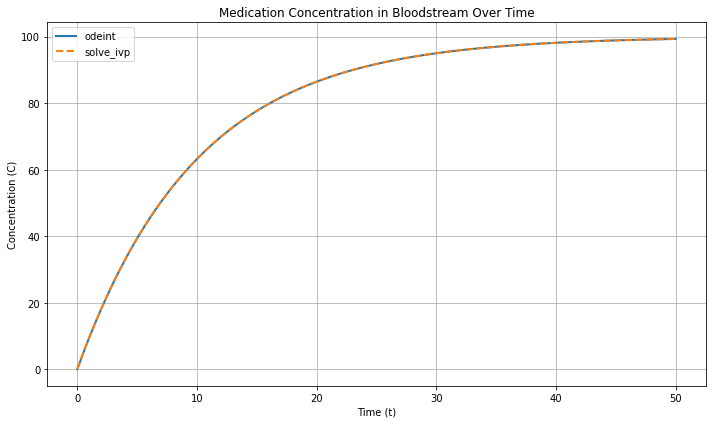

In [16]:
from scipy.integrate import odeint, solve_ivp

# Parameters
k = 0.1
D = 100

# Time range
t = np.linspace(0, 50, 200)

# Initial condition
C0 = 0

# ODE function
def dCdt(C, t):
    return k * (D - C)

def dCdt_ivp(t, C):
    return k * (D - C)

# Using odeint
C_odeint = odeint(dCdt, C0, t)

# Using solve_ivp
sol = solve_ivp(dCdt_ivp, [0, 50], [C0], t_eval=t)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, C_odeint, label='odeint', linewidth=2)
plt.plot(sol.t, sol.y[0], '--', label='solve_ivp', linewidth=2)
plt.title('Medication Concentration in Bloodstream Over Time')
plt.xlabel('Time (t)')
plt.ylabel('Concentration (C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()